# Exercise 2.5

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed (2,000 bandit problems) in which all the q\*(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the q\*(a) on each step).

Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of 10,000 steps.

In [1]:
using Plots
using Random
using Statistics

In [2]:
# simulation parameters
const K = 10
const SIMULATIONS = 2000
const STEPS = 10000
const EPSILON = 0.1
const ALPHA = 0.1;

0.1

In [3]:
function get_reward(values, estimated_values)::Tuple{Int64,Float64}
    # epsilon-greedy algorithm
    if rand() < EPSILON
        # explore
        action = rand(1:K)
    else
        # exploit
        action = argmax(estimated_values)
    end
    # sample from the normal distribution with variance 1 (i.e. stdev 1) and mean equal to the value of the action
    reward = values[action] + randn()
    return action, reward
end

function update_estimated_values!(estimated_values, action, reward, step_size)
    # incremental update of estimated values
    old_estimate = estimated_values[action]
    new_estimate = old_estimate + step_size * (reward - old_estimate)
    estimated_values[action] = new_estimate
end

function perturb_values!(values)
    # values are nonstationary!
    for i in 1:K
        # add a normally distributed increment with mean 0 and standard deviation 0.01
        values[i] += 0.01 * randn()
    end
end;

perturb_values! (generic function with 1 method)

In [4]:
function run_test()
    # reality
    values = zeros(K)

    # models
    estimated_values_sample_avg = zeros(K)
    estimated_values_const_step = zeros(K)

    # track model performance
    rewards_sample_avg = zeros(STEPS)
    optimal_actions_sample_avg = zeros(STEPS)
    rewards_const_step = zeros(STEPS)
    optimal_actions_const_step = zeros(STEPS)

    for step in 1:STEPS
        #step % 10 == 0 && println(values)
        optimal_action = argmax(values)
 
        # run step for sample average model
        action, reward = get_reward(values, estimated_values_sample_avg)
        update_estimated_values!(estimated_values_sample_avg, action, reward, 1.0 / step)

        # track performance
        rewards_sample_avg[step] = reward
        optimal_actions_sample_avg[step] = action == optimal_action

        # run step for constant step size model
        action, reward = get_reward(values, estimated_values_const_step)
        update_estimated_values!(estimated_values_const_step, action, reward, ALPHA)

        # track performance
        rewards_const_step[step] = reward
        optimal_actions_const_step[step] = action == optimal_action

        # permute true values (nonstationary)
        perturb_values!(values)
    end

    return rewards_sample_avg, optimal_actions_sample_avg, rewards_const_step, optimal_actions_const_step
end;

run_test (generic function with 1 method)

In [5]:
println("Running simulations...")

rewards_sample_avg = Array{Array{Float64,1},1}(undef, SIMULATIONS)
optimal_actions_sample_avg = Array{Array{Float64,1},1}(undef, SIMULATIONS)
rewards_const_step = Array{Array{Float64,1},1}(undef, SIMULATIONS)
optimal_actions_const_step = Array{Array{Float64,1},1}(undef, SIMULATIONS)

for i in 1:SIMULATIONS # todo: parallelize
    results = run_test()
    i % 100 == 0 && println("Test #$i completed.")
    #println(results)
    rewards_sample_avg[i], optimal_actions_sample_avg[i], rewards_const_step[i], optimal_actions_const_step[i] = results
end

Running simulations...
Test #100 completed.
Test #200 completed.
Test #300 completed.
Test #400 completed.
Test #500 completed.
Test #600 completed.
Test #700 completed.
Test #800 completed.
Test #900 completed.
Test #1000 completed.
Test #1100 completed.
Test #1200 completed.
Test #1300 completed.
Test #1400 completed.
Test #1500 completed.
Test #1600 completed.
Test #1700 completed.
Test #1800 completed.
Test #1900 completed.
Test #2000 completed.


In [6]:
println("Summarizing results...")
steps = 1:STEPS

avg_reward_sample_avg = [mean([reward[step] for reward in rewards_sample_avg]) for step in steps]

percent_optimal_sample_avg = [sum([action_optimal[step] for action_optimal in optimal_actions_sample_avg]) * 100.0 / SIMULATIONS for step in steps]

avg_reward_const_step = [mean([reward[step] for reward in rewards_const_step]) for step in steps]

percent_optimal_const_step = [sum([action_optimal[step] for action_optimal in optimal_actions_const_step]) * 100.0 / SIMULATIONS for step in steps];

Summarizing results...


Plotting results...


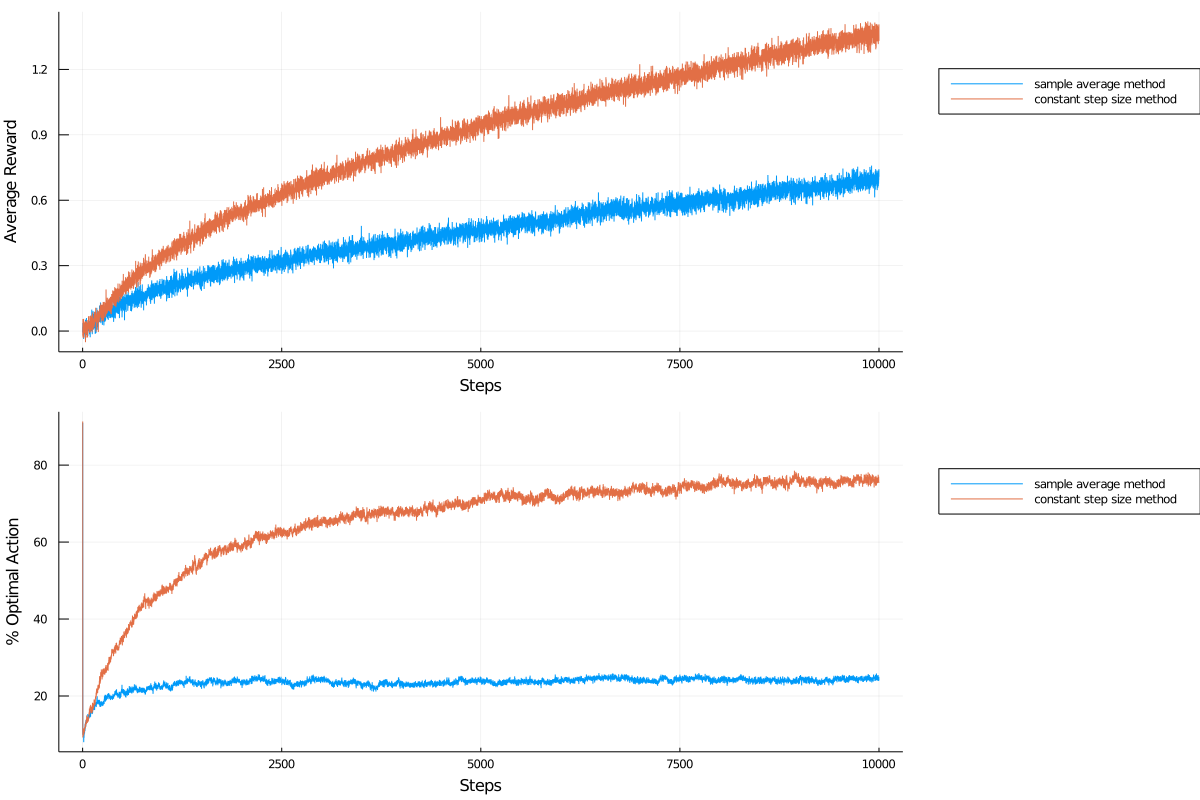

In [7]:
# Plot results
println("Plotting results...")
gr()

# Average reward over steps
avg_reward_plot = plot(steps, avg_reward_sample_avg, label="sample average method")
plot!(steps, avg_reward_const_step, label="constant step size method")
ylabel!("Average Reward")

# Percent of time the optimal action is chosen
percent_optimal_plot = plot(steps, percent_optimal_sample_avg, label="sample average method")
plot!(steps, percent_optimal_const_step, label="constant step size method")
ylabel!("% Optimal Action")

plot(avg_reward_plot, percent_optimal_plot, layout=(2,1), legend=:outertopright, size=(1200, 800))
xlabel!("Steps")